# Introduction

Here I'm figured out how tensorboard works, from http://fizzylogic.nl/2017/05/08/monitor-progress-of-your-keras-based-neural-network-using-tensorboard/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import TensorBoard
import time

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


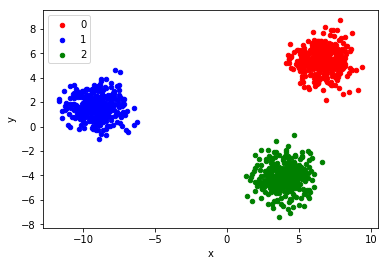

In [2]:
#Load in sample data --- from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

from sklearn.datasets.samples_generator import make_blobs
from pandas import DataFrame
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [3]:
#Back to the tutorial --- first get bearings
index = int(0.9*len(X))
x_train, y_train = X[:index],y[:index]
x_test, y_test = X[index:], y[index:]
input_dim = X.shape[1]
output_dim = 1

model = Sequential()
model.add(Dense(5, input_dim=input_dim,activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(output_dim,activation='linear'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x_train, y_train, verbose=1)

Epoch 1/1
900/900 [==============================] - 0s 142us/step - loss: 0.8256


In [4]:
y_pred = model.predict_on_batch(x_test)
y_pred = np.round(y_pred)
y_pred.resize(len(y_pred))

sum(y_pred == y_test) / (1.0*len(y_test))

0.94

### Now use tensorboard

In [ ]:
index = int(0.9*len(X))
x_train, y_train = X[:index],y[:index]
x_test, y_test = X[index:], y[index:]
input_dim = X.shape[1]
output_dim = 1

#Define model
model = Sequential()
model.add(Dense(100, input_dim=input_dim,activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(output_dim,activation='linear'))
model.compile(optimizer='sgd', loss='mean_squared_error')

#Add in tensor board
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False, write_grads=True)

model.fit(x_train,y_train,epochs=10000,verbose=1,callbacks=[tensorboard])

Epoch 1/10000
900/900 [==============================] - 0s 97us/step - loss: 0.1226
Epoch 2/10000
900/900 [==============================] - 0s 47us/step - loss: 0.0450
Epoch 3/10000
900/900 [==============================] - 0s 39us/step - loss: 0.0407
Epoch 4/10000
900/900 [==============================] - 0s 54us/step - loss: 0.0392
Epoch 5/10000
900/900 [==============================] - 0s 34us/step - loss: 0.0378
Epoch 6/10000
900/900 [==============================] - 0s 37us/step - loss: 0.0372
Epoch 7/10000
900/900 [==============================] - 0s 33us/step - loss: 0.0349
Epoch 8/10000
900/900 [==============================] - 0s 35us/step - loss: 0.0339
Epoch 9/10000
900/900 [==============================] - 0s 22us/step - loss: 0.0326
Epoch 10/10000
900/900 [==============================] - 0s 36us/step - loss: 0.0329
Epoch 11/10000
900/900 [==============================] - 0s 37us/step - loss: 0.0308
Epoch 12/10000
900/900 [==============================] - 0s 41

900/900 [==============================] - 0s 28us/step - loss: 0.0067
Epoch 97/10000
900/900 [==============================] - 0s 28us/step - loss: 0.0054
Epoch 98/10000
900/900 [==============================] - 0s 28us/step - loss: 0.0052
Epoch 99/10000
900/900 [==============================] - 0s 26us/step - loss: 0.0057
Epoch 100/10000
900/900 [==============================] - 0s 27us/step - loss: 0.0054
Epoch 101/10000
900/900 [==============================] - 0s 31us/step - loss: 0.0050
Epoch 102/10000
900/900 [==============================] - 0s 24us/step - loss: 0.0050
Epoch 103/10000
900/900 [==============================] - 0s 35us/step - loss: 0.0050
Epoch 104/10000
900/900 [==============================] - 0s 30us/step - loss: 0.0050
Epoch 105/10000
900/900 [==============================] - 0s 32us/step - loss: 0.0049
Epoch 106/10000
900/900 [==============================] - 0s 24us/step - loss: 0.0047
Epoch 107/10000
900/900 [==============================] - 0s 

900/900 [==============================] - 0s 47us/step - loss: 0.0022
Epoch 191/10000
900/900 [==============================] - 0s 34us/step - loss: 0.0020
Epoch 192/10000
900/900 [==============================] - 0s 33us/step - loss: 0.0020
Epoch 193/10000
900/900 [==============================] - 0s 125us/step - loss: 0.0020
Epoch 194/10000
900/900 [==============================] - 0s 49us/step - loss: 0.0020
Epoch 195/10000
900/900 [==============================] - 0s 28us/step - loss: 0.0019
Epoch 196/10000
900/900 [==============================] - 0s 41us/step - loss: 0.0020
Epoch 197/10000
900/900 [==============================] - 0s 36us/step - loss: 0.0019
Epoch 198/10000
900/900 [==============================] - 0s 67us/step - loss: 0.0019
Epoch 199/10000
900/900 [==============================] - 0s 38us/step - loss: 0.0018
Epoch 200/10000
900/900 [==============================] - 0s 50us/step - loss: 0.0021
Epoch 201/10000
900/900 [==============================] -

900/900 [==============================] - 0s 28us/step - loss: 9.0891e-04
Epoch 284/10000
900/900 [==============================] - 0s 27us/step - loss: 8.9381e-04
Epoch 285/10000
900/900 [==============================] - 0s 38us/step - loss: 9.3426e-04
Epoch 286/10000
900/900 [==============================] - 0s 29us/step - loss: 8.6078e-04
Epoch 287/10000
900/900 [==============================] - 0s 33us/step - loss: 8.5543e-04
Epoch 288/10000
900/900 [==============================] - 0s 35us/step - loss: 8.6827e-04
Epoch 289/10000
900/900 [==============================] - 0s 29us/step - loss: 8.8921e-04
Epoch 290/10000
900/900 [==============================] - 0s 32us/step - loss: 8.4327e-04
Epoch 291/10000
900/900 [==============================] - 0s 29us/step - loss: 7.9784e-04
Epoch 292/10000
900/900 [==============================] - 0s 36us/step - loss: 8.6897e-04
Epoch 293/10000
900/900 [==============================] - 0s 58us/step - loss: 8.2026e-04
Epoch 294/10000

Epoch 373/10000
900/900 [==============================] - 0s 28us/step - loss: 4.1969e-04
Epoch 374/10000
900/900 [==============================] - 0s 36us/step - loss: 4.2770e-04
Epoch 375/10000
900/900 [==============================] - 0s 34us/step - loss: 3.9834e-04
Epoch 376/10000
900/900 [==============================] - 0s 36us/step - loss: 4.1228e-04
Epoch 377/10000
900/900 [==============================] - 0s 33us/step - loss: 3.9690e-04
Epoch 378/10000
900/900 [==============================] - 0s 38us/step - loss: 3.9207e-04
Epoch 379/10000
900/900 [==============================] - 0s 33us/step - loss: 3.7908e-04
Epoch 380/10000
900/900 [==============================] - 0s 31us/step - loss: 3.9253e-04
Epoch 381/10000
900/900 [==============================] - 0s 27us/step - loss: 4.0538e-04
Epoch 382/10000
900/900 [==============================] - 0s 38us/step - loss: 3.9672e-04
Epoch 383/10000
900/900 [==============================] - 0s 27us/step - loss: 3.8914e-04

900/900 [==============================] - 0s 25us/step - loss: 2.0748e-04
Epoch 464/10000
900/900 [==============================] - 0s 27us/step - loss: 1.9935e-04
Epoch 465/10000
900/900 [==============================] - 0s 24us/step - loss: 1.9935e-04
Epoch 466/10000
900/900 [==============================] - 0s 25us/step - loss: 2.2668e-04
Epoch 467/10000
900/900 [==============================] - 0s 32us/step - loss: 1.9391e-04
Epoch 468/10000
900/900 [==============================] - 0s 30us/step - loss: 2.2366e-04
Epoch 469/10000
900/900 [==============================] - 0s 31us/step - loss: 1.8877e-04
Epoch 470/10000
900/900 [==============================] - 0s 31us/step - loss: 1.9820e-04
Epoch 471/10000
900/900 [==============================] - 0s 31us/step - loss: 1.9748e-04
Epoch 472/10000
900/900 [==============================] - 0s 37us/step - loss: 1.9683e-04
Epoch 473/10000
900/900 [==============================] - 0s 29us/step - loss: 1.9736e-04
Epoch 474/10000

900/900 [==============================] - 0s 23us/step - loss: 1.1840e-04
Epoch 554/10000
900/900 [==============================] - 0s 33us/step - loss: 1.0784e-04
Epoch 555/10000
900/900 [==============================] - 0s 29us/step - loss: 1.0717e-04
Epoch 556/10000
900/900 [==============================] - 0s 28us/step - loss: 1.1640e-04
Epoch 557/10000
900/900 [==============================] - 0s 30us/step - loss: 1.1052e-04
Epoch 558/10000
900/900 [==============================] - 0s 33us/step - loss: 1.0105e-04
Epoch 559/10000
900/900 [==============================] - 0s 34us/step - loss: 1.0998e-04
Epoch 560/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0600e-04
Epoch 561/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0568e-04
Epoch 562/10000
900/900 [==============================] - 0s 30us/step - loss: 1.0172e-04
Epoch 563/10000
900/900 [==============================] - 0s 32us/step - loss: 1.0049e-04
Epoch 564/10000

900/900 [==============================] - 0s 39us/step - loss: 6.3725e-05
Epoch 643/10000
900/900 [==============================] - 0s 36us/step - loss: 6.3476e-05
Epoch 644/10000
900/900 [==============================] - 0s 43us/step - loss: 6.2489e-05
Epoch 645/10000
900/900 [==============================] - 0s 35us/step - loss: 6.4356e-05
Epoch 646/10000
900/900 [==============================] - 0s 35us/step - loss: 6.2084e-05
Epoch 647/10000
900/900 [==============================] - 0s 30us/step - loss: 6.4669e-05
Epoch 648/10000
900/900 [==============================] - 0s 34us/step - loss: 6.1276e-05
Epoch 649/10000
900/900 [==============================] - 0s 34us/step - loss: 6.1697e-05
Epoch 650/10000
900/900 [==============================] - 0s 30us/step - loss: 6.1534e-05
Epoch 651/10000
900/900 [==============================] - 0s 32us/step - loss: 5.8885e-05
Epoch 652/10000
900/900 [==============================] - 0s 34us/step - loss: 6.0497e-05
Epoch 653/10000

900/900 [==============================] - 0s 29us/step - loss: 4.2811e-05
Epoch 733/10000
900/900 [==============================] - 0s 29us/step - loss: 4.4380e-05
Epoch 734/10000
900/900 [==============================] - 0s 42us/step - loss: 4.1722e-05
Epoch 735/10000
900/900 [==============================] - 0s 34us/step - loss: 4.3437e-05
Epoch 736/10000
900/900 [==============================] - 0s 37us/step - loss: 4.1911e-05
Epoch 737/10000
900/900 [==============================] - 0s 37us/step - loss: 4.1117e-05
Epoch 738/10000
900/900 [==============================] - 0s 33us/step - loss: 4.0492e-05
Epoch 739/10000
900/900 [==============================] - 0s 31us/step - loss: 4.2577e-05
Epoch 740/10000
900/900 [==============================] - 0s 30us/step - loss: 4.1895e-05
Epoch 741/10000
900/900 [==============================] - 0s 32us/step - loss: 4.0900e-05
Epoch 742/10000
900/900 [==============================] - 0s 30us/step - loss: 3.9880e-05
Epoch 743/10000

900/900 [==============================] - 0s 24us/step - loss: 3.3334e-05
Epoch 822/10000
900/900 [==============================] - 0s 29us/step - loss: 3.1572e-05
Epoch 823/10000
900/900 [==============================] - 0s 31us/step - loss: 3.0245e-05
Epoch 824/10000
900/900 [==============================] - 0s 30us/step - loss: 3.1087e-05
Epoch 825/10000
900/900 [==============================] - 0s 30us/step - loss: 3.0719e-05
Epoch 826/10000
900/900 [==============================] - 0s 44us/step - loss: 3.1007e-05
Epoch 827/10000
900/900 [==============================] - 0s 31us/step - loss: 3.0212e-05
Epoch 828/10000
900/900 [==============================] - 0s 29us/step - loss: 2.9677e-05
Epoch 829/10000
900/900 [==============================] - 0s 41us/step - loss: 2.9921e-05
Epoch 830/10000
900/900 [==============================] - 0s 37us/step - loss: 3.0378e-05
Epoch 831/10000
900/900 [==============================] - 0s 47us/step - loss: 3.0360e-05
Epoch 832/10000

900/900 [==============================] - 0s 33us/step - loss: 2.5467e-05
Epoch 912/10000
900/900 [==============================] - 0s 40us/step - loss: 2.3643e-05
Epoch 913/10000
900/900 [==============================] - 0s 33us/step - loss: 2.4540e-05
Epoch 914/10000
900/900 [==============================] - 0s 30us/step - loss: 2.4818e-05
Epoch 915/10000
900/900 [==============================] - 0s 39us/step - loss: 2.3868e-05
Epoch 916/10000
900/900 [==============================] - 0s 36us/step - loss: 2.4814e-05
Epoch 917/10000
900/900 [==============================] - 0s 34us/step - loss: 2.3635e-05
Epoch 918/10000
900/900 [==============================] - 0s 37us/step - loss: 2.3828e-05
Epoch 919/10000
900/900 [==============================] - 0s 33us/step - loss: 2.3303e-05
Epoch 920/10000
900/900 [==============================] - 0s 36us/step - loss: 2.4347e-05
Epoch 921/10000
900/900 [==============================] - 0s 37us/step - loss: 2.4185e-05
Epoch 922/10000

900/900 [==============================] - 0s 31us/step - loss: 2.1019e-05
Epoch 1002/10000
900/900 [==============================] - 0s 32us/step - loss: 2.0308e-05
Epoch 1003/10000
900/900 [==============================] - 0s 32us/step - loss: 2.0660e-05
Epoch 1004/10000
900/900 [==============================] - 0s 28us/step - loss: 2.0608e-05
Epoch 1005/10000
900/900 [==============================] - 0s 29us/step - loss: 2.1207e-05
Epoch 1006/10000
900/900 [==============================] - 0s 32us/step - loss: 2.0254e-05
Epoch 1007/10000
900/900 [==============================] - 0s 29us/step - loss: 2.0432e-05
Epoch 1008/10000
900/900 [==============================] - 0s 28us/step - loss: 2.0662e-05
Epoch 1009/10000
900/900 [==============================] - 0s 32us/step - loss: 2.0126e-05
Epoch 1010/10000
900/900 [==============================] - 0s 27us/step - loss: 2.0095e-05
Epoch 1011/10000
900/900 [==============================] - 0s 30us/step - loss: 2.1039e-05
Epoch

900/900 [==============================] - 0s 27us/step - loss: 1.8667e-05
Epoch 1090/10000
900/900 [==============================] - 0s 27us/step - loss: 1.8841e-05
Epoch 1091/10000
900/900 [==============================] - 0s 33us/step - loss: 1.8195e-05
Epoch 1092/10000
900/900 [==============================] - 0s 31us/step - loss: 1.8886e-05
Epoch 1093/10000
900/900 [==============================] - 0s 28us/step - loss: 1.8636e-05
Epoch 1094/10000
900/900 [==============================] - 0s 30us/step - loss: 1.9061e-05
Epoch 1095/10000
900/900 [==============================] - 0s 30us/step - loss: 1.9047e-05
Epoch 1096/10000
900/900 [==============================] - 0s 32us/step - loss: 1.9566e-05
Epoch 1097/10000
900/900 [==============================] - 0s 42us/step - loss: 1.9317e-05
Epoch 1098/10000
900/900 [==============================] - 0s 78us/step - loss: 1.8594e-05
Epoch 1099/10000
900/900 [==============================] - 0s 85us/step - loss: 1.9734e-05
Epoch

900/900 [==============================] - 0s 41us/step - loss: 2.6834e-05
Epoch 1178/10000
900/900 [==============================] - 0s 27us/step - loss: 1.8389e-05
Epoch 1179/10000
900/900 [==============================] - 0s 38us/step - loss: 1.7521e-05
Epoch 1180/10000
900/900 [==============================] - 0s 32us/step - loss: 1.7453e-05
Epoch 1181/10000
900/900 [==============================] - 0s 35us/step - loss: 1.7628e-05
Epoch 1182/10000
900/900 [==============================] - 0s 30us/step - loss: 1.7047e-05
Epoch 1183/10000
900/900 [==============================] - 0s 35us/step - loss: 1.8093e-05
Epoch 1184/10000
900/900 [==============================] - 0s 33us/step - loss: 1.7662e-05
Epoch 1185/10000
900/900 [==============================] - 0s 34us/step - loss: 1.7543e-05
Epoch 1186/10000
900/900 [==============================] - 0s 35us/step - loss: 1.8077e-05
Epoch 1187/10000
900/900 [==============================] - 0s 37us/step - loss: 1.7887e-05
Epoch

900/900 [==============================] - 0s 28us/step - loss: 1.7539e-05
Epoch 1266/10000
900/900 [==============================] - 0s 27us/step - loss: 1.6837e-05
Epoch 1267/10000
900/900 [==============================] - 0s 30us/step - loss: 1.7001e-05
Epoch 1268/10000
900/900 [==============================] - 0s 29us/step - loss: 1.6718e-05
Epoch 1269/10000
900/900 [==============================] - 0s 31us/step - loss: 1.6631e-05
Epoch 1270/10000
900/900 [==============================] - 0s 34us/step - loss: 1.7569e-05
Epoch 1271/10000
900/900 [==============================] - 0s 30us/step - loss: 1.7585e-05
Epoch 1272/10000
900/900 [==============================] - 0s 30us/step - loss: 1.6519e-05
Epoch 1273/10000
900/900 [==============================] - 0s 31us/step - loss: 1.6951e-05
Epoch 1274/10000
900/900 [==============================] - 0s 27us/step - loss: 1.7884e-05
Epoch 1275/10000
900/900 [==============================] - 0s 30us/step - loss: 1.7107e-05
Epoch

900/900 [==============================] - 0s 28us/step - loss: 1.6515e-05
Epoch 1354/10000
900/900 [==============================] - 0s 31us/step - loss: 1.6418e-05
Epoch 1355/10000
900/900 [==============================] - 0s 26us/step - loss: 1.6878e-05
Epoch 1356/10000
900/900 [==============================] - 0s 32us/step - loss: 1.6202e-05
Epoch 1357/10000
900/900 [==============================] - 0s 38us/step - loss: 1.6467e-05
Epoch 1358/10000
900/900 [==============================] - 0s 32us/step - loss: 1.6242e-05
Epoch 1359/10000
900/900 [==============================] - 0s 28us/step - loss: 1.6614e-05
Epoch 1360/10000
900/900 [==============================] - 0s 31us/step - loss: 1.7122e-05
Epoch 1361/10000
900/900 [==============================] - 0s 43us/step - loss: 1.7149e-05
Epoch 1362/10000
900/900 [==============================] - 0s 43us/step - loss: 1.6164e-05
Epoch 1363/10000
900/900 [==============================] - 0s 32us/step - loss: 1.6310e-05
Epoch

900/900 [==============================] - 0s 26us/step - loss: 1.5578e-05
Epoch 1442/10000
900/900 [==============================] - 0s 27us/step - loss: 1.5463e-05
Epoch 1443/10000
900/900 [==============================] - 0s 35us/step - loss: 1.5585e-05
Epoch 1444/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5544e-05
Epoch 1445/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5430e-05
Epoch 1446/10000
900/900 [==============================] - 0s 28us/step - loss: 1.5742e-05
Epoch 1447/10000
900/900 [==============================] - 0s 34us/step - loss: 1.5650e-05
Epoch 1448/10000
900/900 [==============================] - 0s 29us/step - loss: 1.5813e-05
Epoch 1449/10000
900/900 [==============================] - 0s 28us/step - loss: 1.5913e-05
Epoch 1450/10000
900/900 [==============================] - 0s 27us/step - loss: 1.5421e-05
Epoch 1451/10000
900/900 [==============================] - 0s 26us/step - loss: 1.5520e-05
Epoch

Epoch 1530/10000
900/900 [==============================] - 0s 34us/step - loss: 1.5818e-05
Epoch 1531/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5310e-05
Epoch 1532/10000
900/900 [==============================] - ETA: 0s - loss: 1.9296e-0 - 0s 45us/step - loss: 1.6241e-05
Epoch 1533/10000
900/900 [==============================] - 0s 114us/step - loss: 1.5102e-05
Epoch 1534/10000
900/900 [==============================] - 0s 104us/step - loss: 1.5338e-05
Epoch 1535/10000
900/900 [==============================] - 0s 50us/step - loss: 1.4978e-05
Epoch 1536/10000
900/900 [==============================] - 0s 38us/step - loss: 1.5686e-05
Epoch 1537/10000
900/900 [==============================] - 0s 39us/step - loss: 1.5657e-05
Epoch 1538/10000
900/900 [==============================] - 0s 29us/step - loss: 1.5766e-05
Epoch 1539/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5434e-05
Epoch 1540/10000
900/900 [========================

900/900 [==============================] - 0s 30us/step - loss: 1.4765e-05
Epoch 1619/10000
900/900 [==============================] - 0s 25us/step - loss: 1.5032e-05
Epoch 1620/10000
900/900 [==============================] - 0s 31us/step - loss: 1.4998e-05
Epoch 1621/10000
900/900 [==============================] - 0s 27us/step - loss: 1.5133e-05
Epoch 1622/10000
900/900 [==============================] - 0s 27us/step - loss: 1.5090e-05
Epoch 1623/10000
900/900 [==============================] - 0s 31us/step - loss: 1.5142e-05
Epoch 1624/10000
900/900 [==============================] - 0s 29us/step - loss: 1.5151e-05
Epoch 1625/10000
900/900 [==============================] - 0s 27us/step - loss: 1.5127e-05
Epoch 1626/10000
900/900 [==============================] - 0s 37us/step - loss: 1.5312e-05
Epoch 1627/10000
900/900 [==============================] - 0s 29us/step - loss: 1.4771e-05
Epoch 1628/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5006e-05
Epoch

900/900 [==============================] - 0s 31us/step - loss: 1.4777e-05
Epoch 1708/10000
900/900 [==============================] - 0s 25us/step - loss: 1.6141e-05
Epoch 1709/10000
900/900 [==============================] - 0s 61us/step - loss: 1.4714e-05
Epoch 1710/10000
900/900 [==============================] - 0s 195us/step - loss: 1.4664e-05
Epoch 1711/10000
900/900 [==============================] - 0s 47us/step - loss: 1.4620e-05
Epoch 1712/10000
900/900 [==============================] - 0s 33us/step - loss: 1.4720e-05
Epoch 1713/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4739e-05
Epoch 1714/10000
900/900 [==============================] - 0s 26us/step - loss: 1.5386e-05
Epoch 1715/10000
900/900 [==============================] - 0s 29us/step - loss: 1.4901e-05
Epoch 1716/10000
900/900 [==============================] - 0s 27us/step - loss: 1.4519e-05
Epoch 1717/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4811e-05
Epoc

900/900 [==============================] - 0s 28us/step - loss: 1.6577e-05
Epoch 1797/10000
900/900 [==============================] - 0s 38us/step - loss: 1.4890e-05
Epoch 1798/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4610e-05
Epoch 1799/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4458e-05
Epoch 1800/10000
900/900 [==============================] - 0s 35us/step - loss: 1.4569e-05
Epoch 1801/10000
900/900 [==============================] - 0s 31us/step - loss: 1.4716e-05
Epoch 1802/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4448e-05
Epoch 1803/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4169e-05
Epoch 1804/10000
900/900 [==============================] - 0s 32us/step - loss: 1.4625e-05
Epoch 1805/10000
900/900 [==============================] - 0s 30us/step - loss: 1.7181e-05
Epoch 1806/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4478e-05
Epoch

900/900 [==============================] - 0s 31us/step - loss: 1.4457e-05
Epoch 1886/10000
900/900 [==============================] - 0s 22us/step - loss: 1.4143e-05
Epoch 1887/10000
900/900 [==============================] - 0s 42us/step - loss: 1.4467e-05
Epoch 1888/10000
900/900 [==============================] - 0s 42us/step - loss: 1.4255e-05
Epoch 1889/10000
900/900 [==============================] - 0s 39us/step - loss: 1.4058e-05
Epoch 1890/10000
900/900 [==============================] - 0s 32us/step - loss: 1.4139e-05
Epoch 1891/10000
900/900 [==============================] - 0s 29us/step - loss: 1.4373e-05
Epoch 1892/10000
900/900 [==============================] - 0s 30us/step - loss: 1.5130e-05
Epoch 1893/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4273e-05
Epoch 1894/10000
900/900 [==============================] - 0s 26us/step - loss: 1.4565e-05
Epoch 1895/10000
900/900 [==============================] - 0s 26us/step - loss: 1.4215e-05
Epoch

900/900 [==============================] - 0s 26us/step - loss: 1.4616e-05
Epoch 1974/10000
900/900 [==============================] - 0s 23us/step - loss: 1.4005e-05
Epoch 1975/10000
900/900 [==============================] - 0s 39us/step - loss: 1.3981e-05
Epoch 1976/10000
900/900 [==============================] - 0s 33us/step - loss: 1.3708e-05
Epoch 1977/10000
900/900 [==============================] - 0s 29us/step - loss: 1.3693e-05
Epoch 1978/10000
900/900 [==============================] - 0s 29us/step - loss: 1.4052e-05
Epoch 1979/10000
900/900 [==============================] - 0s 30us/step - loss: 1.4095e-05
Epoch 1980/10000
900/900 [==============================] - 0s 30us/step - loss: 1.3449e-05
Epoch 1981/10000
900/900 [==============================] - 0s 31us/step - loss: 1.3641e-05
Epoch 1982/10000
900/900 [==============================] - 0s 28us/step - loss: 1.4039e-05
Epoch 1983/10000
900/900 [==============================] - 0s 28us/step - loss: 1.7167e-05
Epoch

900/900 [==============================] - 0s 30us/step - loss: 1.3038e-05
Epoch 2063/10000
900/900 [==============================] - 0s 29us/step - loss: 1.3052e-05
Epoch 2064/10000
900/900 [==============================] - 0s 29us/step - loss: 1.3677e-05
Epoch 2065/10000
900/900 [==============================] - 0s 32us/step - loss: 1.4137e-05
Epoch 2066/10000
900/900 [==============================] - 0s 30us/step - loss: 1.2676e-05
Epoch 2067/10000
900/900 [==============================] - 0s 25us/step - loss: 1.3344e-05
Epoch 2068/10000
900/900 [==============================] - 0s 31us/step - loss: 1.3252e-05
Epoch 2069/10000
900/900 [==============================] - 0s 34us/step - loss: 1.3607e-05
Epoch 2070/10000
900/900 [==============================] - 0s 31us/step - loss: 1.3569e-05
Epoch 2071/10000
900/900 [==============================] - 0s 35us/step - loss: 1.3624e-05
Epoch 2072/10000
900/900 [==============================] - 0s 26us/step - loss: 1.3036e-05
Epoch

900/900 [==============================] - 0s 31us/step - loss: 1.3173e-05
Epoch 2151/10000
900/900 [==============================] - 0s 30us/step - loss: 1.3402e-05
Epoch 2152/10000
900/900 [==============================] - 0s 27us/step - loss: 1.2769e-05
Epoch 2153/10000
900/900 [==============================] - 0s 25us/step - loss: 1.3102e-05
Epoch 2154/10000
900/900 [==============================] - 0s 33us/step - loss: 1.2536e-05
Epoch 2155/10000
900/900 [==============================] - 0s 27us/step - loss: 1.3406e-05
Epoch 2156/10000
900/900 [==============================] - 0s 27us/step - loss: 1.3522e-05
Epoch 2157/10000
900/900 [==============================] - 0s 30us/step - loss: 1.3156e-05
Epoch 2158/10000
900/900 [==============================] - 0s 34us/step - loss: 1.3732e-05
Epoch 2159/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2843e-05
Epoch 2160/10000
900/900 [==============================] - 0s 25us/step - loss: 1.2951e-05
Epoch

900/900 [==============================] - 0s 24us/step - loss: 1.2680e-05
Epoch 2239/10000
900/900 [==============================] - 0s 35us/step - loss: 1.3324e-05
Epoch 2240/10000
900/900 [==============================] - 0s 37us/step - loss: 1.2594e-05
Epoch 2241/10000
900/900 [==============================] - 0s 32us/step - loss: 1.2810e-05
Epoch 2242/10000
900/900 [==============================] - 0s 29us/step - loss: 1.2999e-05
Epoch 2243/10000
900/900 [==============================] - 0s 27us/step - loss: 1.2815e-05
Epoch 2244/10000
900/900 [==============================] - 0s 32us/step - loss: 1.2771e-05
Epoch 2245/10000
900/900 [==============================] - 0s 28us/step - loss: 1.2828e-05
Epoch 2246/10000
 32/900 [>.............................] - ETA: 0s - loss: 2.1798e-06